**Data preprocessing**

In [1]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load in all csv files for every year 2015-2023
files = ['WHR_2015.csv', 'WHR_2016.csv', 'WHR_2017.csv', 'WHR_2018.csv', 'WHR_2019.csv', 'WHR_2020.csv', 'WHR_2021.csv', 'WHR_2022.csv', 'WHR_2023.csv']
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
dataframes = []

for file, year in zip(files, years):
  df = pd.read_csv(file)
  df['Year'] = year
  dataframes.append(df)

# join all of the dataframes into a single one
df = pd.concat(dataframes, ignore_index=True)
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023
1363,Zimbabwe,Sub-Saharan Africa,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023
1364,Sierra Leone,Sub-Saharan Africa,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023
1365,Lebanon,Middle East and North Africa,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023


***Testing for outliers***

**General features of numerical columns**

In [2]:
# show the general features of each column
outlier_df = df.drop(columns=['Year', 'country', 'region'])
outlier_df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000


**Counting outliers in each column**

In [3]:
# check if values are outliers using the innerquartile range
def count_outliers(column):
      first_quartile = column.quantile(0.25)
      third_quartile = column.quantile(0.75)
      IQR = third_quartile - first_quartile
      lower_bound = first_quartile - 1.5 * IQR
      upper_bound = third_quartile + 1.5 * IQR
      outliers = (column < lower_bound) | (column > upper_bound)
      outliers_count = outliers.sum()
      return outliers_count

outlier_df.apply(count_outliers)

happiness_score                   1
gdp_per_capita                    0
social_support                   14
healthy_life_expectancy           0
freedom_to_make_life_choices     17
generosity                       50
perceptions_of_corruption       110
dtype: int64

**Graph**  (black dots represent outliers)

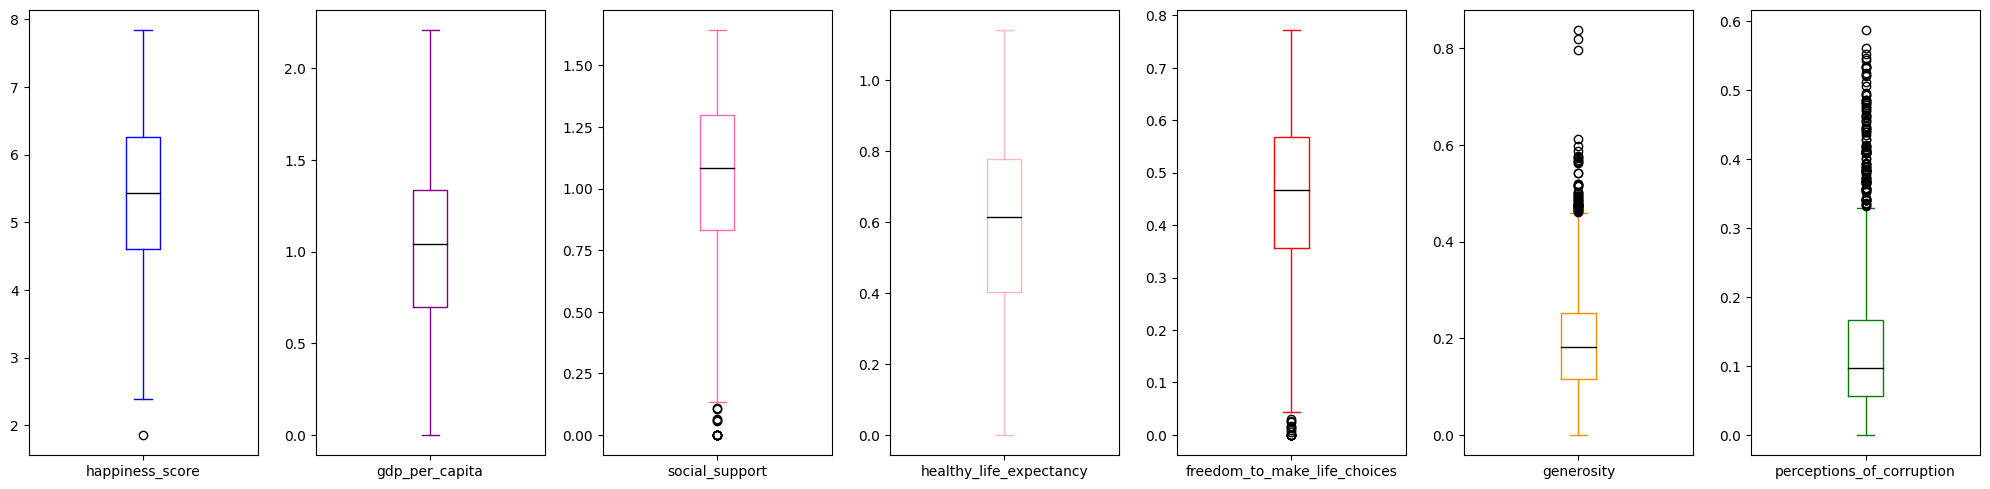

In [4]:
# create boxplots for each column
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
colors = ['blue', 'purple', 'hotpink', 'lightpink', 'red', 'darkorange', 'green']
for i, (column, color) in enumerate(zip(outlier_df.columns, colors)):
    outlier_df[column].plot(kind='box', ax=axes[i], color=dict(boxes=color, whiskers=color, medians='black', caps=color))
plt.tight_layout()
plt.show()

**Correlation Coefficient Matrix between happiness, gdp, and healthy life expectancy**

In [5]:
correlations = df[['happiness_score', 'gdp_per_capita', 'healthy_life_expectancy']].corr()
print(correlations)
# strong correlation between happy -> gdp
# less strong with happy -> healthy
# weak with gdp -> healhty

                         happiness_score  gdp_per_capita  \
happiness_score                  1.00000        0.723810   
gdp_per_capita                   0.72381        1.000000   
healthy_life_expectancy          0.68240        0.564953   

                         healthy_life_expectancy  
happiness_score                         0.682400  
gdp_per_capita                          0.564953  
healthy_life_expectancy                 1.000000  


Heatmap Representing the strength of the relationship

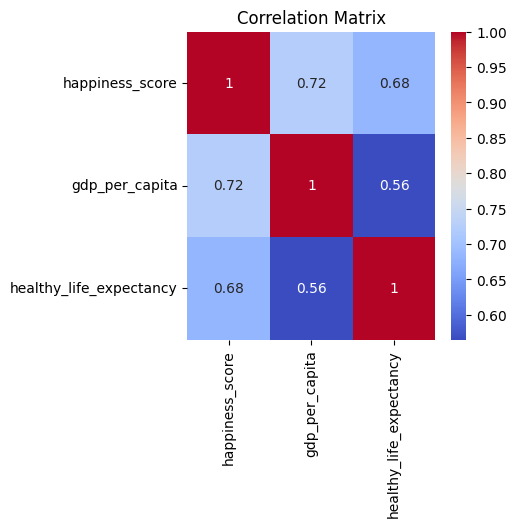

In [6]:
plt.figure(figsize = (4,4))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Basic data exploration and summary statistics**


***ANOVA Test***

Hypothesis test on whether the region of an person has a correlation with their happiness score. Assume alpha is .05


$H_{0}$: *There is no difference between any of the region means*

$H_{A}$: *There is a difference between at least one of the region means*

In [7]:
from scipy.stats import f_oneway
unique_regions = df['region'].unique()
region_happiness = [df[df['region'] == regions]['happiness_score'] for regions in unique_regions]
anova = f_oneway(*region_happiness)
print(anova)

F_onewayResult(statistic=211.37965272897168, pvalue=2.7398731578598975e-268)


**Conclusion**

We will reject the null hypothesis because the p-value is < .05.  The alternative hypothesis "there is a difference between at least one of the region means" is true and the findings are significant.

**Graph**

<ipython-input-8-52ed9b59037f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'happiness_score', y = 'region', data = df, palette = palette, orient = 'h', order = mean_vals)


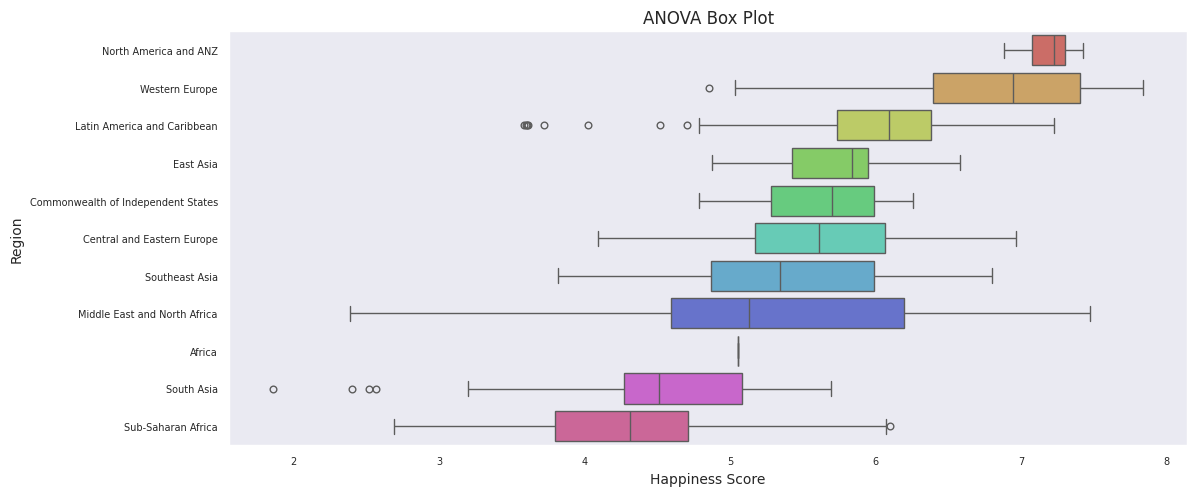

In [8]:
# sort mean values by descending order
mean_vals = df.groupby('region')['happiness_score'].mean().sort_values(ascending = False).index
sns.set(style="dark")
palette = sns.color_palette("hls", 11)
plt.figure(figsize=(12,5))
sns.set_context("paper", font_scale=0.8)
sns.boxplot(x = 'happiness_score', y = 'region', data = df, palette = palette, orient = 'h', order = mean_vals)
plt.title("ANOVA Box Plot", fontsize = 12)
plt.xlabel("Happiness Score", fontsize = 10)
plt.ylabel("Region", fontsize = 10)
plt.tight_layout()
plt.show()